<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [103]:
train = pd.read_csv('//content//train.csv')
test = pd.read_csv('//content//test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Variáveis quantitativas**:

*   Age
*   Parch
*   Fare

**Variáveis qualitativas**:

*   Survived
*   Pclass
*   Sex
*   Sibsp
*   Ticket
*   Cabin
*   Embarked

**Verificando valores nulos**



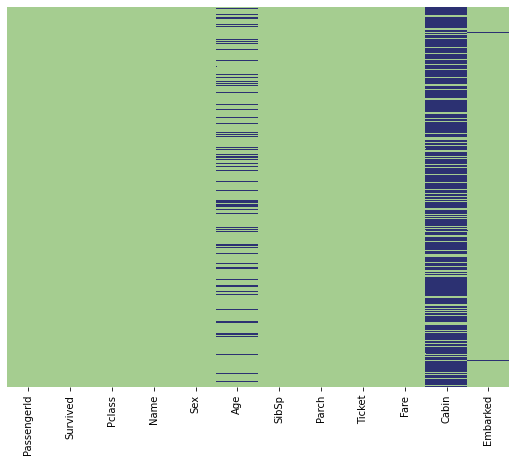

In [104]:
plt.figure(figsize=(9, 7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [105]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

**Separando as variáveis qualitativas e quantitativas**

In [106]:
train_num = train[['Age', 'SibSp', 'Fare']]
train_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

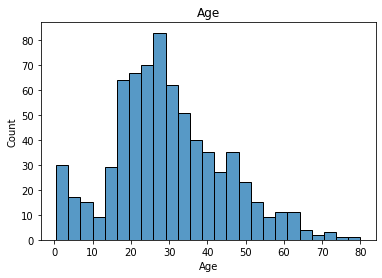

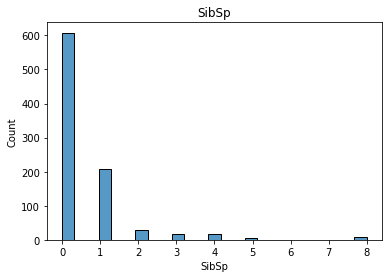

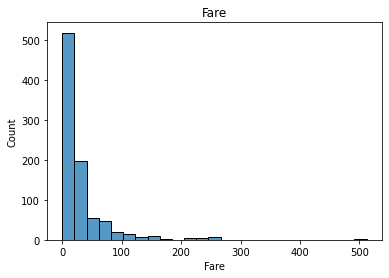

In [107]:
for i in train_num.columns:
  sns.histplot(train_num[i], bins=25)
  plt.title(i)
  plt.show()

**Conhecendo a variabilidade da idade em função da classe de passegeiro**

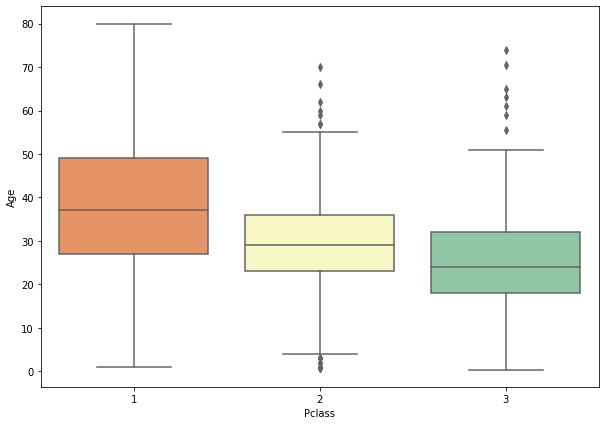

In [108]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=train, x='Pclass', y='Age', palette='Spectral')

**Limpeza dos dados**

In [109]:
def preencher_idade(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37

    elif Pclass == 2:
      return 29

    else:
      return 24

  else:
    return Age

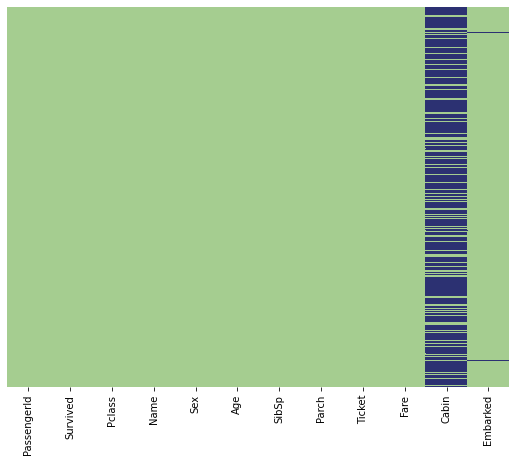

In [110]:
train['Age'] = train[['Age', 'Pclass']].apply(preencher_idade, axis=1)

plt.figure(figsize=(9, 7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [112]:
train.drop(['Cabin'], axis=1, inplace=True)

**Convertendo variáveis categóricas**

In [113]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)

train = pd.concat([train, sex, embarked], axis=1)

In [114]:
train['Embarked'] = train['Embarked'].fillna('C')

In [ ]:
train.drop('Cabin', axis=1, inplace=True)

In [115]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

**Construindo os modelos de Machine Learning**

**1 - Regressão Logística**




In [116]:
#from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [117]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
predictions = logistic_model.predict(X_test)

In [122]:
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        51
           1       0.78      0.54      0.64        39

    accuracy                           0.73        90
   macro avg       0.75      0.71      0.71        90
weighted avg       0.74      0.73      0.72        90



**2 - Random Forest**

In [126]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
rf_predictions = random_forest.predict(X_test)

In [129]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90

